In [1]:
from pathlib import Path as path
import spectrochempy as scp
from spectrochempy import ur
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.gridspec as gridspec
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.colorbar import Colorbar
import sys

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.6.9© Copyright 2014-2025 - A.Travert & C.Fernandez @ LCS


In [35]:
# 画图的初始设置
plt.style.use(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-python\Figure\liuchzzyy.mplstyle')
# display(plt.style.available)

# 颜色设定
sys.path.append(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Python\Figure')
from colors import tol_cmap, tol_cset
colors = list(tol_cset('vibrant'))
if r'sunset' not in plt.colormaps():
    plt.colormaps.register(tol_cmap('sunset'))
if r'rainbow_PuRd' not in plt.colormaps():
    plt.colormaps.register(tol_cmap('rainbow_PuRd')) # 备用 plasma

# 设置数学字体 Set math font
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'
mpl.rcParams['mathtext.it'] = 'Arial:italic'
mpl.rcParams['mathtext.bf'] = 'Arial:bold'
mpl.rcParams['mathtext.sf'] = 'Arial'
mpl.rcParams['mathtext.tt'] = 'Arial'
mpl.rcParams['mathtext.cal'] = 'Arial'
mpl.rcParams['mathtext.default'] = 'regular'

# 输出的文件夹
path_out = path(r"C:\Users\chengliu\Desktop\Figure")

In [3]:
# 读取电化学数据
path_filelist = list(path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\XAS\ExSitu\αMnO2\XAS\EMD-SK\Echem\HaC FC').glob(r'*.txt'))

echem = []
for path_file in path_filelist[1:2]:
    line_skip = None
    with open(path_file, 'r', encoding='latin_1') as file:
        for line in file:
            if line.startswith('Nb header lines'):
                line_skip = int(line.split(':')[1].strip())
                break  # 发现后立即退出循环，提高效率

    df = pd.read_csv(path_file, sep='\t', comment='#', skiprows=line_skip-1, encoding='latin_1', index_col=None, decimal='.').dropna(axis=1, how='all') 
     # # 转换数据格式
    df[['Ewe/V', '<I>/mA','Capacity/mA.h']] = df[['Ewe/V', '<I>/mA','Capacity/mA.h']].apply(pd.to_numeric, errors='coerce')
    df['time/s'] = df['time/s'].apply(pd.to_datetime, format='mixed', errors='coerce')
    df['cycle number'] = df['cycle number'].astype(float).astype(np.int16)
    df = df.iloc[:,[0,1,2,4,5]]
    echem.append(df)

# 选取每个数据的第一到第二圈
for i in range(len(echem)):
    echem[i] = echem[i][echem[i].iloc[:, 0].isin([0, 1])]

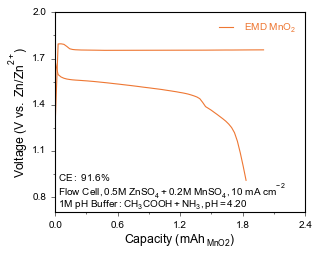

In [ ]:
%matplotlib inline
plt.close('all')

# 画图
fig = plt.figure(figsize=(3.3, 2.5))
gs = gridspec.GridSpec(1, 1, width_ratios=None, height_ratios=None, wspace=0, hspace=0, figure=fig)

# 图
subfig = fig.add_subfigure(gs[0, 0])
ax = subfig.add_axes((0, 0, 1, 1))
ax.set_box_aspect(0.8)

labels = [[r'$\mathrm{EMD \ MnO_2}$', None, None, None], [r'$\mathrm{2^{nd}}$', None, None, None], [r'$\mathrm{3^{rd}}$', None, None, None], [r'$\mathrm{4^{th}}$', None, None, None]]
for i, data in enumerate(echem):
    for j, idx in enumerate(data.iloc[:, 0].unique()):
        temp = data[data.iloc[:, 0] == idx]
        temp = temp[temp['Ewe/V'] > 0.9]
        # 找到容量的最大值的索引
        idx_max = temp['Capacity/mA.h'].idxmax()
        idx_min = temp['Capacity/mA.h'].idxmin()
        # 断开最大值前后的曲线
        ax.plot(temp.loc[:idx_max, 'Capacity/mA.h']/9, temp.loc[:idx_max, 'Ewe/V'], ls='-', lw=1.0, c=colors[j], label=labels[j][i], zorder=0) # labels[i][j], colors[i]
        ax.plot(temp.loc[idx_max+1:442, 'Capacity/mA.h']/9, temp.loc[idx_max+1:442, 'Ewe/V'], ls='-', lw=1.0, c=colors[j], label=None, zorder=0)

# 设置刻度线等格式
ax.set_xlabel(r"$\mathrm{Capacity \ (mAh \,_{MnO2})}$", fontsize=11, labelpad=1.0)
ax.set_xlim(0, 2.4)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.6, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=0.3, offset=0))

ax.set_ylabel(r"$\mathrm{Voltage \ (V \ vs. \ Zn/Zn^{2+}\!)}$", fontsize=11, labelpad=1.0)
ax.set_ylim(0.7, 2.0)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.3, offset=-0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.15,  offset=-0.1))

ax.tick_params(axis='both', which='both', direction='out', labelsize=9, top=False , right=False, labeltop=False, labelright=False)
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), ncols=1, frameon=False, labelcolor='linecolor', fontsize=9)

ax.text(0.01, 0.20, r'$\mathrm{CE: \ 91.6\%}$', ha='left', va='top', transform=ax.transAxes, fontsize=9, c='k')
ax.text(0.01, 0.15, r'$\mathrm{Flow \ Cell, 0.5M \ ZnSO_4 + 0.2M \ MnSO_4, 10 \ mA \ cm^{-2}}$', ha='left', va='top', transform=ax.transAxes, fontsize=9, c='k')
ax.text(0.01, 0.07, r'$\mathrm{1M \ pH \ Buffer: CH_3COOH + NH_3, pH=4.20}$', ha='left', va='top', transform=ax.transAxes, fontsize=9, c='k')


# 保存图片
plt.savefig(path.joinpath(path_out, r'Ecehm_XAS_BulkCell_Buffer_300.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'Ecehm_XAS_BulkCell_Buffer_600.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'Ecehm_XAS_BulkCell_Buffer_600.png'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False)
plt.gcf().set_facecolor('white') 
plt.show()